## Plots for loop tests for which all subcats have the same number of a single LID

In [1]:
# IMPORTANT:  RUN THIS BLOCK FIRST
# ONLY for loop tests for which all subcats have the same number of a single LID:
%matplotlib inline
from pymongo import MongoClient
from datetime import datetime
import matplotlib.pyplot as plt
def volume_reduction_and_runoff_volume_vs_lid_number(collectionName):
    mGal = 133680.5  # 1 Million gallon in cubic feet
    runs = db[collectionName]
    cursor = runs.find()
    numList = []
    volReductionList = []
    totalSurfaceOutflowList = []
    csoVolList=[]
    noLidRun = cursor[0]
    noLidVolume = noLidRun['volume']
    for run in cursor:
        runParamsZero = run['runParamList'][0] 
        number = runParamsZero['Number']
        numList.append(number)
        volume = run['volume']
        volReduction = noLidVolume-volume
        volReductionList.append(volReduction)
        cso=run['cso_volume']
        csoVolList.append(cso)
        if run['lidDict'] == None:
            totalSurfaceOutflowList.append(None)
            continue
        else:
            totalSurfaceOutflow = 0.0
            runParamList = run['runParamList']
            lidDict = run['lidDict']
            for lidUsage in runParamList:
                lid = lidUsage['LID']
                subcat = lidUsage['Subcat']
                lidNumber = lidUsage['Number']
                #print lidNumber,
                lidArea = lidUsage['Area']  # in square feet
                lidKey = subcat+' '+lid
                surfaceOutflowInches = lidDict[lidKey]['Surface Outflow']
                surfaceOutflow = surfaceOutflowInches*lidNumber*lidArea/12.0  # cubic feet
                totalSurfaceOutflow += surfaceOutflow/mGal  # convert to million Gal/year
                
            #print totalSurfaceOutflow
            totalSurfaceOutflowList.append(totalSurfaceOutflow)


    return(numList, csoVolList, volReductionList, totalSurfaceOutflowList)

### Show the collections that have been generated

In [2]:
from pymongo import MongoClient

#  IMPORTANT:  Set these for each run:
#################################################
# mongoServer = None   # use the local mongodb server installed on your computer
#mongoServer = 'mongodb://server.mcgarity.info:27017/'  # Art's personal server
#mongoServer = 'mongodb://ubuntu:27017/'  # ubuntu Linux virtual machine on Art's Mac
mongoServer = 'mongodb://aws-2.greenphilly.net:27017/'  # aws-2 server for GreenPhilly
database = "ewri2017"
username = "arthur"
password = "jXlIkLfu5Dfr"
authenticationDatabase = "admin"
collection = 'july'
client = MongoClient(mongoServer)
################################################

db = client[database]
db.authenticate(username, password, source=authenticationDatabase)  # pass credentials to database
collectionNames = sorted(db.collection_names())
collectionNames

[u'july']

### Plot Results from Increasing numbers of Wakefield Raingardens in S1 - S6

Collection(Database(MongoClient('aws-2.greenphilly.net', 27017), u'ewri2017'), u'july')
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.11199999999999477, 0.22299999999998477, 0.3340000000000032, 0.4449999999999932, 0.556999999999988, 0.6680000000000064, 0.7789999999999964, 0.8899999999999864, 1.0019999999999811, 1.1129999999999995, 1.225999999999999, 1.335000000000008, 1.4470000000000027, 1.5579999999999927, 1.6680000000000064, 1.781000000000006, 1.8930000000000007, 2.002999999999986, 2.115000000000009, 2.2239999999999895], [None, 0.032514708577541226, 0.06502941715508245, 0.09741940671975344, 0.12991101918380019, 0.16213471673131086, 0.19453394474137964, 0.22747362180721942, 0.25948945433327975, 0.29159305209061903, 0.32422324123563273, 0.35649313101013236, 0.38956676553424013, 0.4205294152849518, 0.45339518478760926, 0.4861962851724821, 0.51

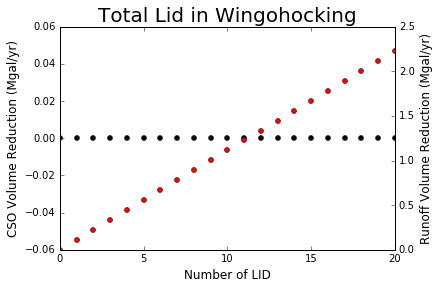

In [4]:
collectionName = 'july'
print db[collectionName]
x = volume_reduction_and_runoff_volume_vs_lid_number(collectionName)
print x
(fig, ax1) = plt.subplots()
ax1.plot(x[0],x[1],'ko',markersize = 5)
ax1.set_xlabel("Number of LID",fontsize=12)
ax1.set_ylabel("CSO Volume Reduction (Mgal/yr)",fontsize=12)
ax2 = ax1.twinx()
ax2.plot(x[0],x[2],'ro',markersize = 5)
ax2.set_ylabel("Runoff Volume Reduction (Mgal/yr)",fontsize=12)
plt.title('Total Lid in Wingohocking',fontsize=20)
